In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 500
sns.set_context("notebook")
sns.set(style='white')
plt.rcParams['font.family'] = 'Myriad Pro'

In [2]:
lbl_sz = 4
plt.rc('xtick', labelsize=lbl_sz)
plt.rc('ytick', labelsize=lbl_sz)

mpl.rcParams['xtick.major.pad']='-2'
mpl.rcParams['ytick.major.pad']='-2'

mpl.rcParams['font.sans-serif'] = ['Open Sans']
sns.set_style('white', {'axes.edgecolor':'black'})
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
c1 = '7dba84-81171B-f4743b-073b3a-fe4a49'.split('-')
c2 = '473198-FFA552-FAA916-16DB65-CBEF43'.split('-')
c3 = 'FA198B-35A7FF-C8553D-7A306C-216869'.split('-')
c = c1 + c2 + c3
c = ['#' + c_i for c_i in c]

In [4]:
def style_axs(axs, dimred):
    for ax in axs:
        ax.spines['left'].set_linewidth(0.25)
        ax.spines['top'].set_linewidth(0.25)
        ax.spines['bottom'].set_linewidth(0.25)
        ax.spines['right'].set_linewidth(0.25)
        ax.set_xlabel(f'{dimred}_1', fontsize=14, labelpad=0)
        ax.set_ylabel(f'{dimred}_2', fontsize=14, labelpad=0)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        try:
            ax.get_legend().remove()
        except:
            pass

In [19]:
def plot_sam_cellvgae(cellvgae_data, sam_data, clusters_labels, savename, cellvgae_ari, sam_ari):
    clusters_labels_formatted = [' '.join(c.capitalize().split('_')) for c in clusters_labels]
    fig, axs = plt.subplots(1, 2)
    
    clr = random.sample(c, len(set(clusters_labels_formatted)))
    plt.tight_layout(w_pad=1.5, h_pad=3.5)
    
    sns.scatterplot(x=cellvgae_data[:, 0], y=cellvgae_data[:, 1], hue=clusters_labels_formatted, palette=clr, s=8, linewidth=0.0, ax=axs[0])
    axs[0].set_title('CellVGAE\n{:.4f}'.format(cellvgae_ari), y=1.0, fontdict={'fontsize': 21})
    sns.scatterplot(x=sam_data[:, 0], y=sam_data[:, 1], hue=clusters_labels_formatted, palette=clr, s=8, linewidth=0.0, ax=axs[1])
    axs[1].set_title('SAM\n{:.4f}'.format(sam_ari), y=1.0, fontdict={'fontsize': 21})
    
    style_axs(axs, dimred='UMAP')
    axs[1].legend(prop={'size': 8}, bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0., labelspacing=1, frameon=False, handletextpad=0.1)
    
    axs[0].axis('equal')
    axs[1].axis('equal')
    
    fig.set_figheight(4)
    fig.set_figwidth(8.5)
    
    plt.savefig(f'{savename}.pdf', dpi=350, bbox_inches='tight')
    
    return clr

In [9]:
baron1_gt_clusters = pd.read_csv('../Baron1/Baron1_ground_truth.csv')['assigned_cluster'].values
baron2_gt_clusters = pd.read_csv('../Baron2/Baron2_ground_truth.csv')['assigned_cluster'].values
baron3_gt_clusters = pd.read_csv('../Baron3/Baron3_ground_truth.csv')['assigned_cluster'].values
baron4_gt_clusters = pd.read_csv('../Baron4/Baron4_ground_truth.csv')['assigned_cluster'].values
darmanis_gt_clusters = pd.read_csv('../darmanis/darmanis_ground_truth.csv')['Cluster'].values
loh_gt_clusters = pd.read_csv('../loh/loh_ground_truth.csv')['Cluster'].values
muraro_gt_clusters = pd.read_csv('../muraro/muraro_ground_truth.csv')['Cluster'].values
seger_gt_clusters = pd.read_csv('../segerstolpe/seger_ground_truth.csv')['Cluster'].values
wang_gt_clusters = pd.read_csv('../wang/wang_ground_truth.csv')['Cluster'].values

In [10]:
sam_umaps = np.load('sam_umaps.npy', allow_pickle=True).item()

In [11]:
# Dataset -- ARI -- SC
for name, vls in sam_umaps.items():
    print('{} -- {:.4f} -- {:.4f}'.format(name, vls[0], vls[1]))

baron1 -- 0.9625 -- 0.7084
baron2 -- 0.9681 -- 0.6447
baron3 -- 0.9456 -- 0.7256
baron4 -- 0.9301 -- 0.7588
darmanis -- 0.9199 -- 0.7008
loh -- 0.9674 -- 0.7434
muraro -- 0.9262 -- 0.7329
seger -- 0.9360 -- 0.3843
wang -- 0.8944 -- 0.2932


In [12]:
cellvgae_aris = {'baron1': 0.9670, 'baron2': 0.9817, 'baron3': 0.9723, 'baron4': 0.9764, 'darmanis': 0.9472, 'loh': 0.9684, 'muraro': 0.9503, 'seger': 0.9734, 'wang': 0.9418}

In [15]:
cellvgae_baron1 = np.load('../Baron1/umap.npy')
cellvgae_baron2 = np.load('../Baron2/umap.npy')
cellvgae_baron3 = np.load('../Baron3/umap.npy')
cellvgae_baron4 = np.load('../Baron4/umap.npy')
cellvgae_darmanis = np.load('../darmanis/umap.npy')
cellvgae_loh = np.load('../loh/umap.npy')
cellvgae_muraro = np.load('../muraro/umap.npy')
cellvgae_seger = np.load('../segerstolpe/umap.npy')
cellvgae_wang = np.load('../wang/umap.npy')

In [16]:
colours = {}

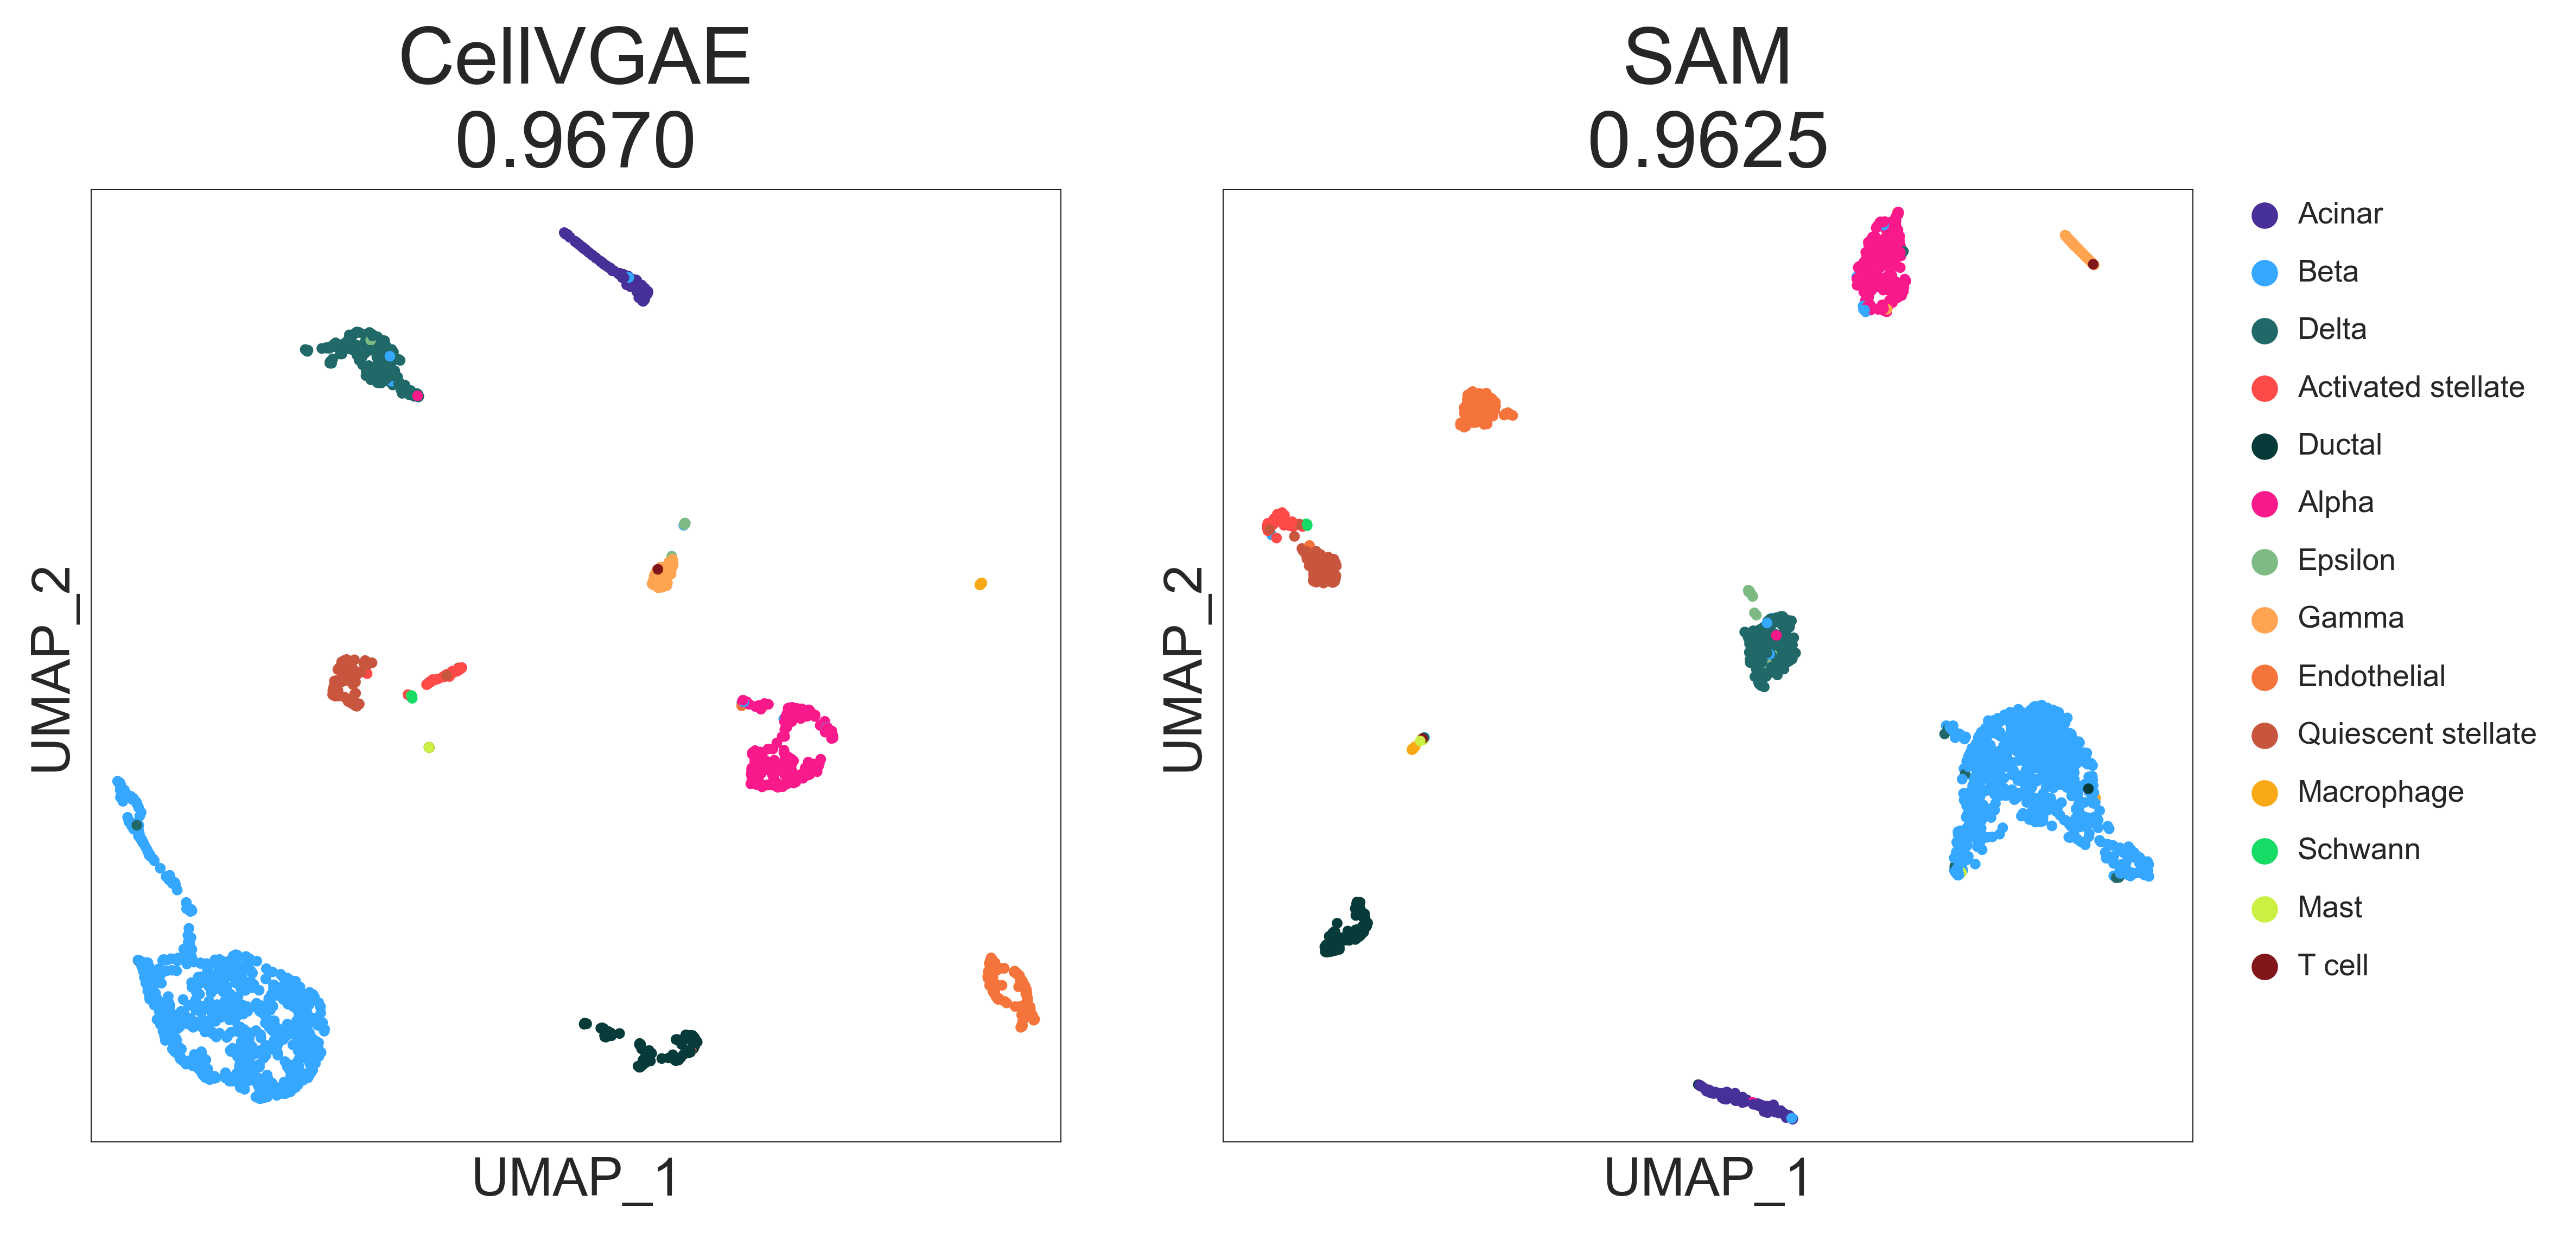

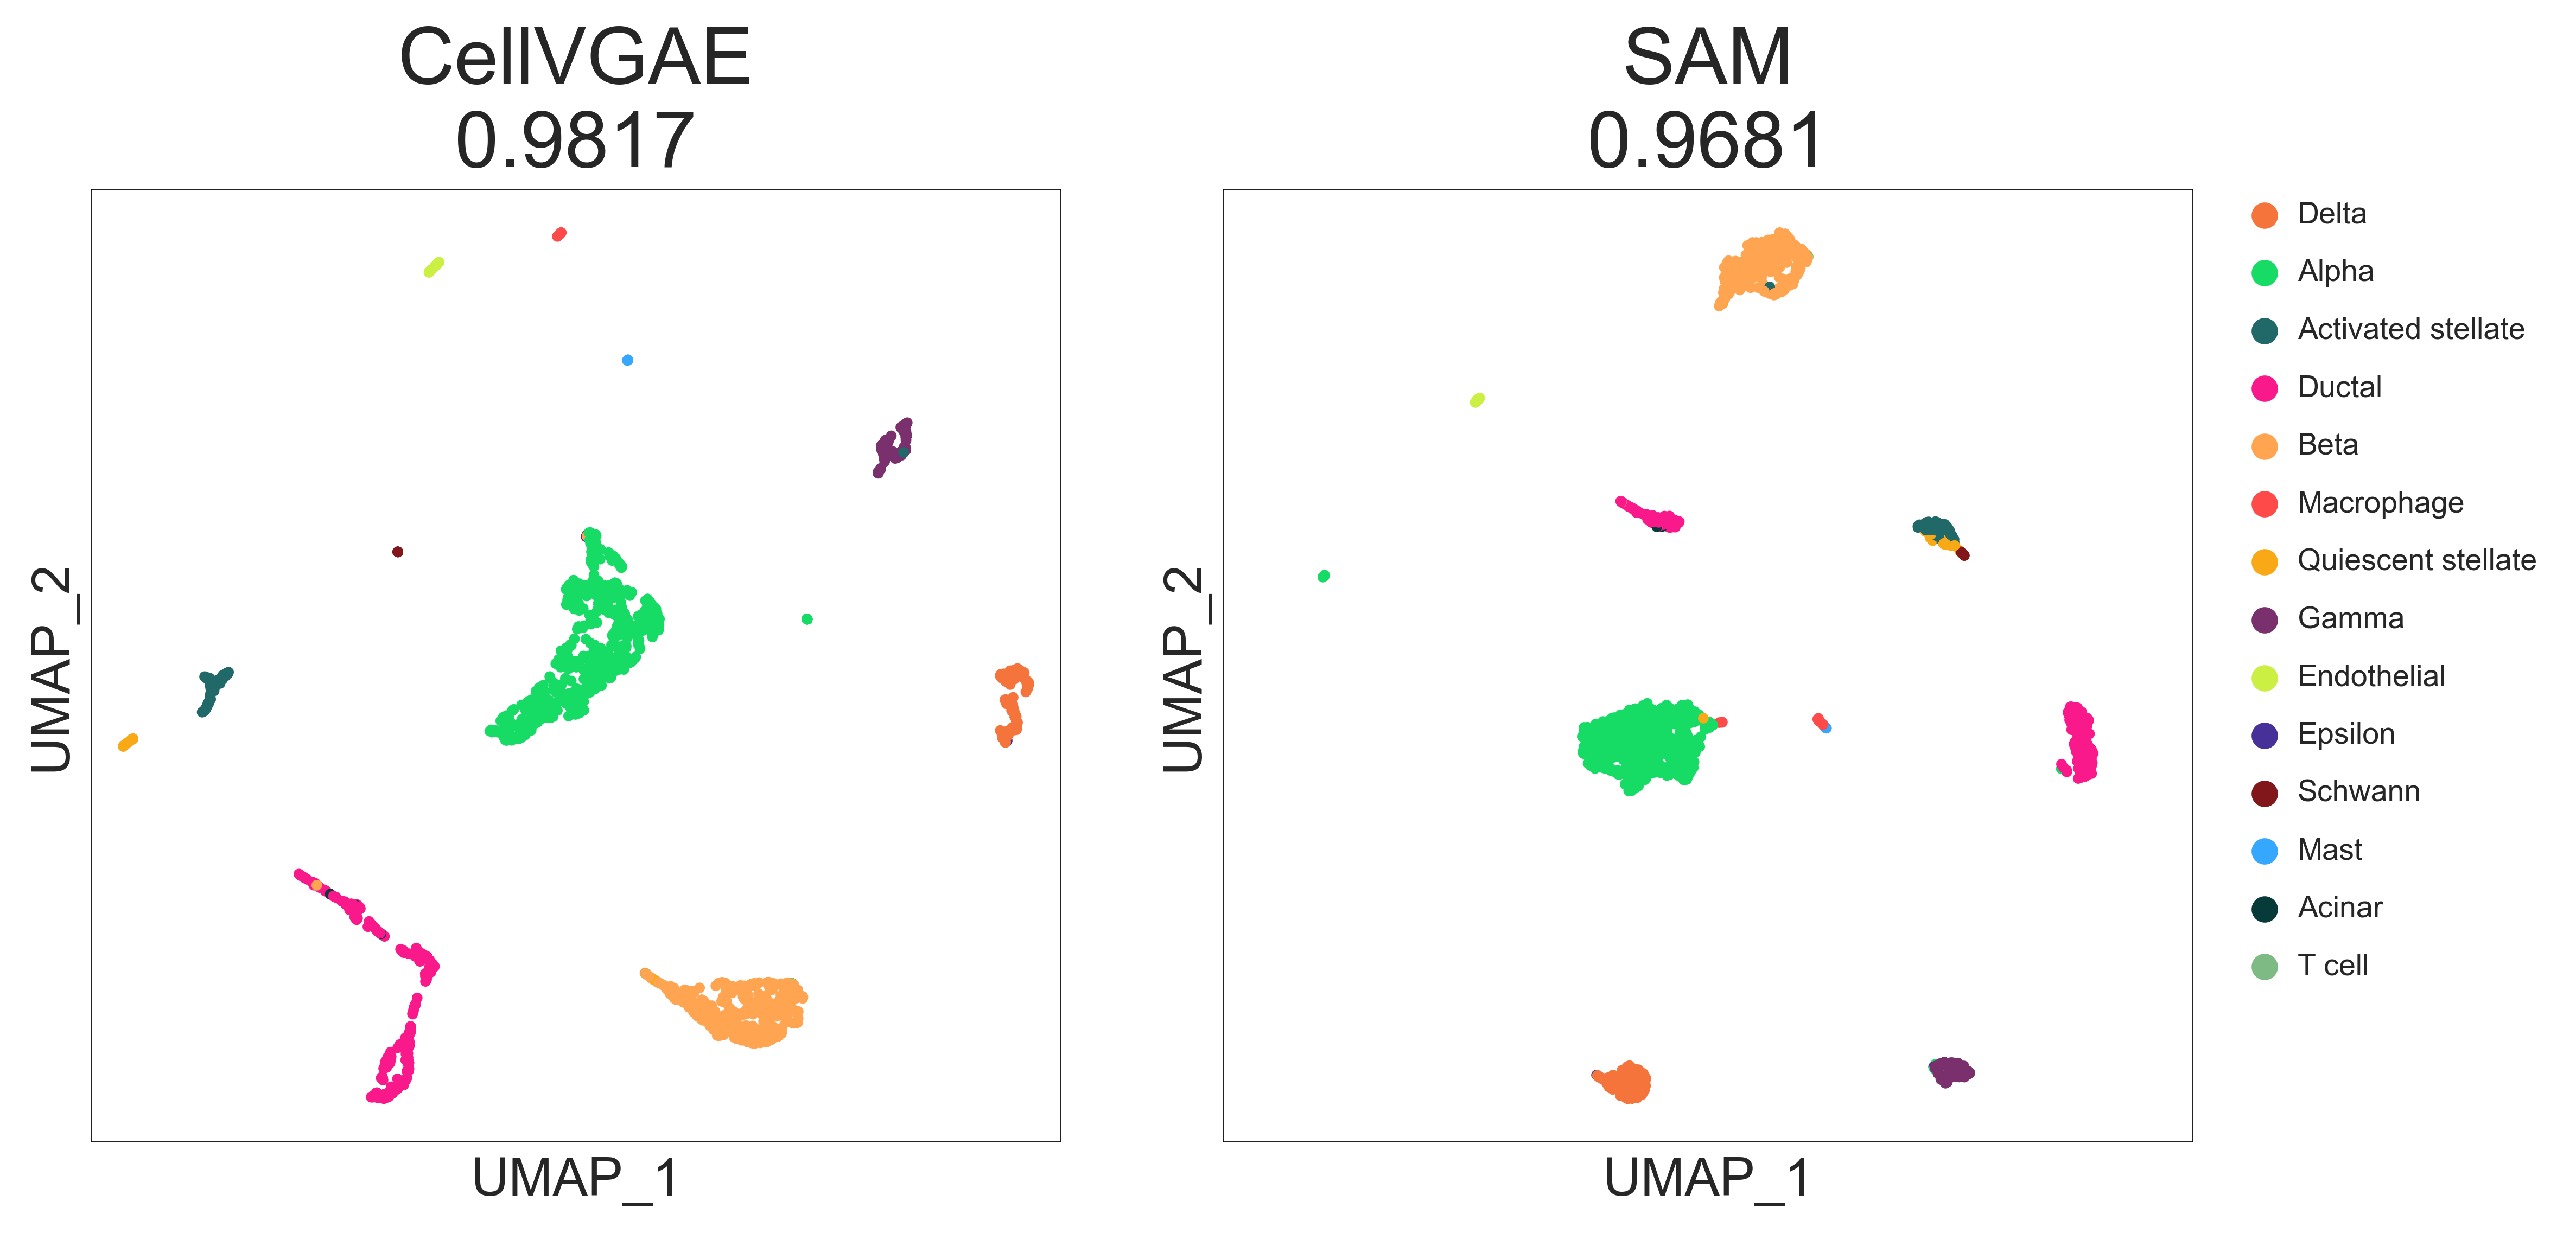

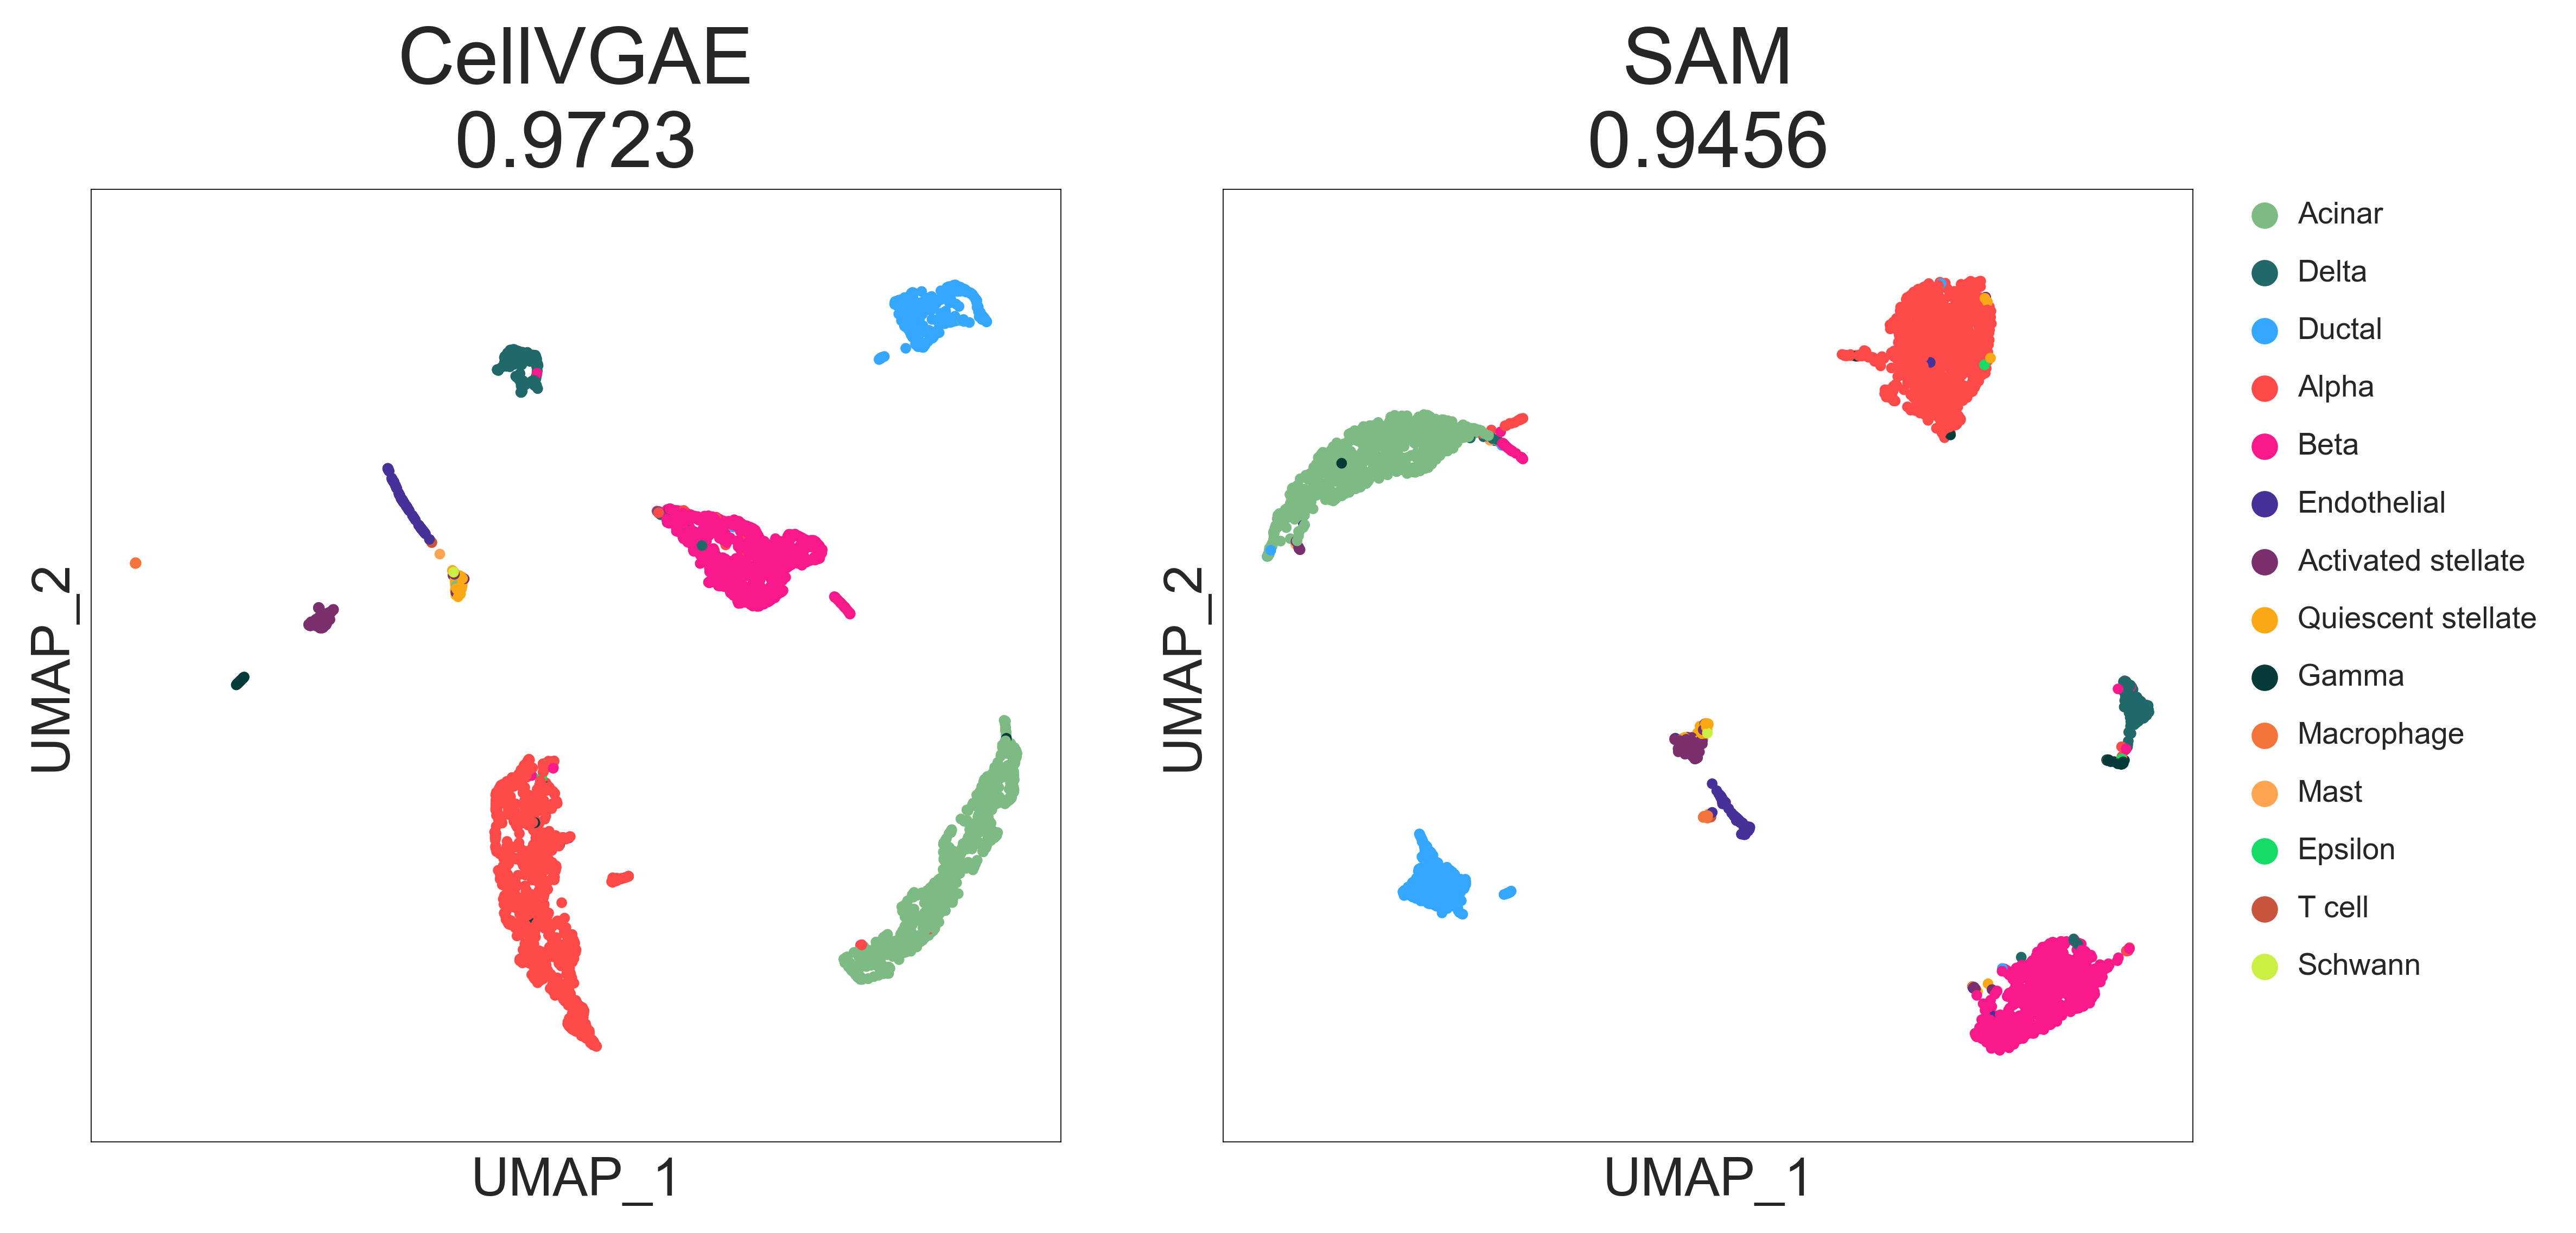

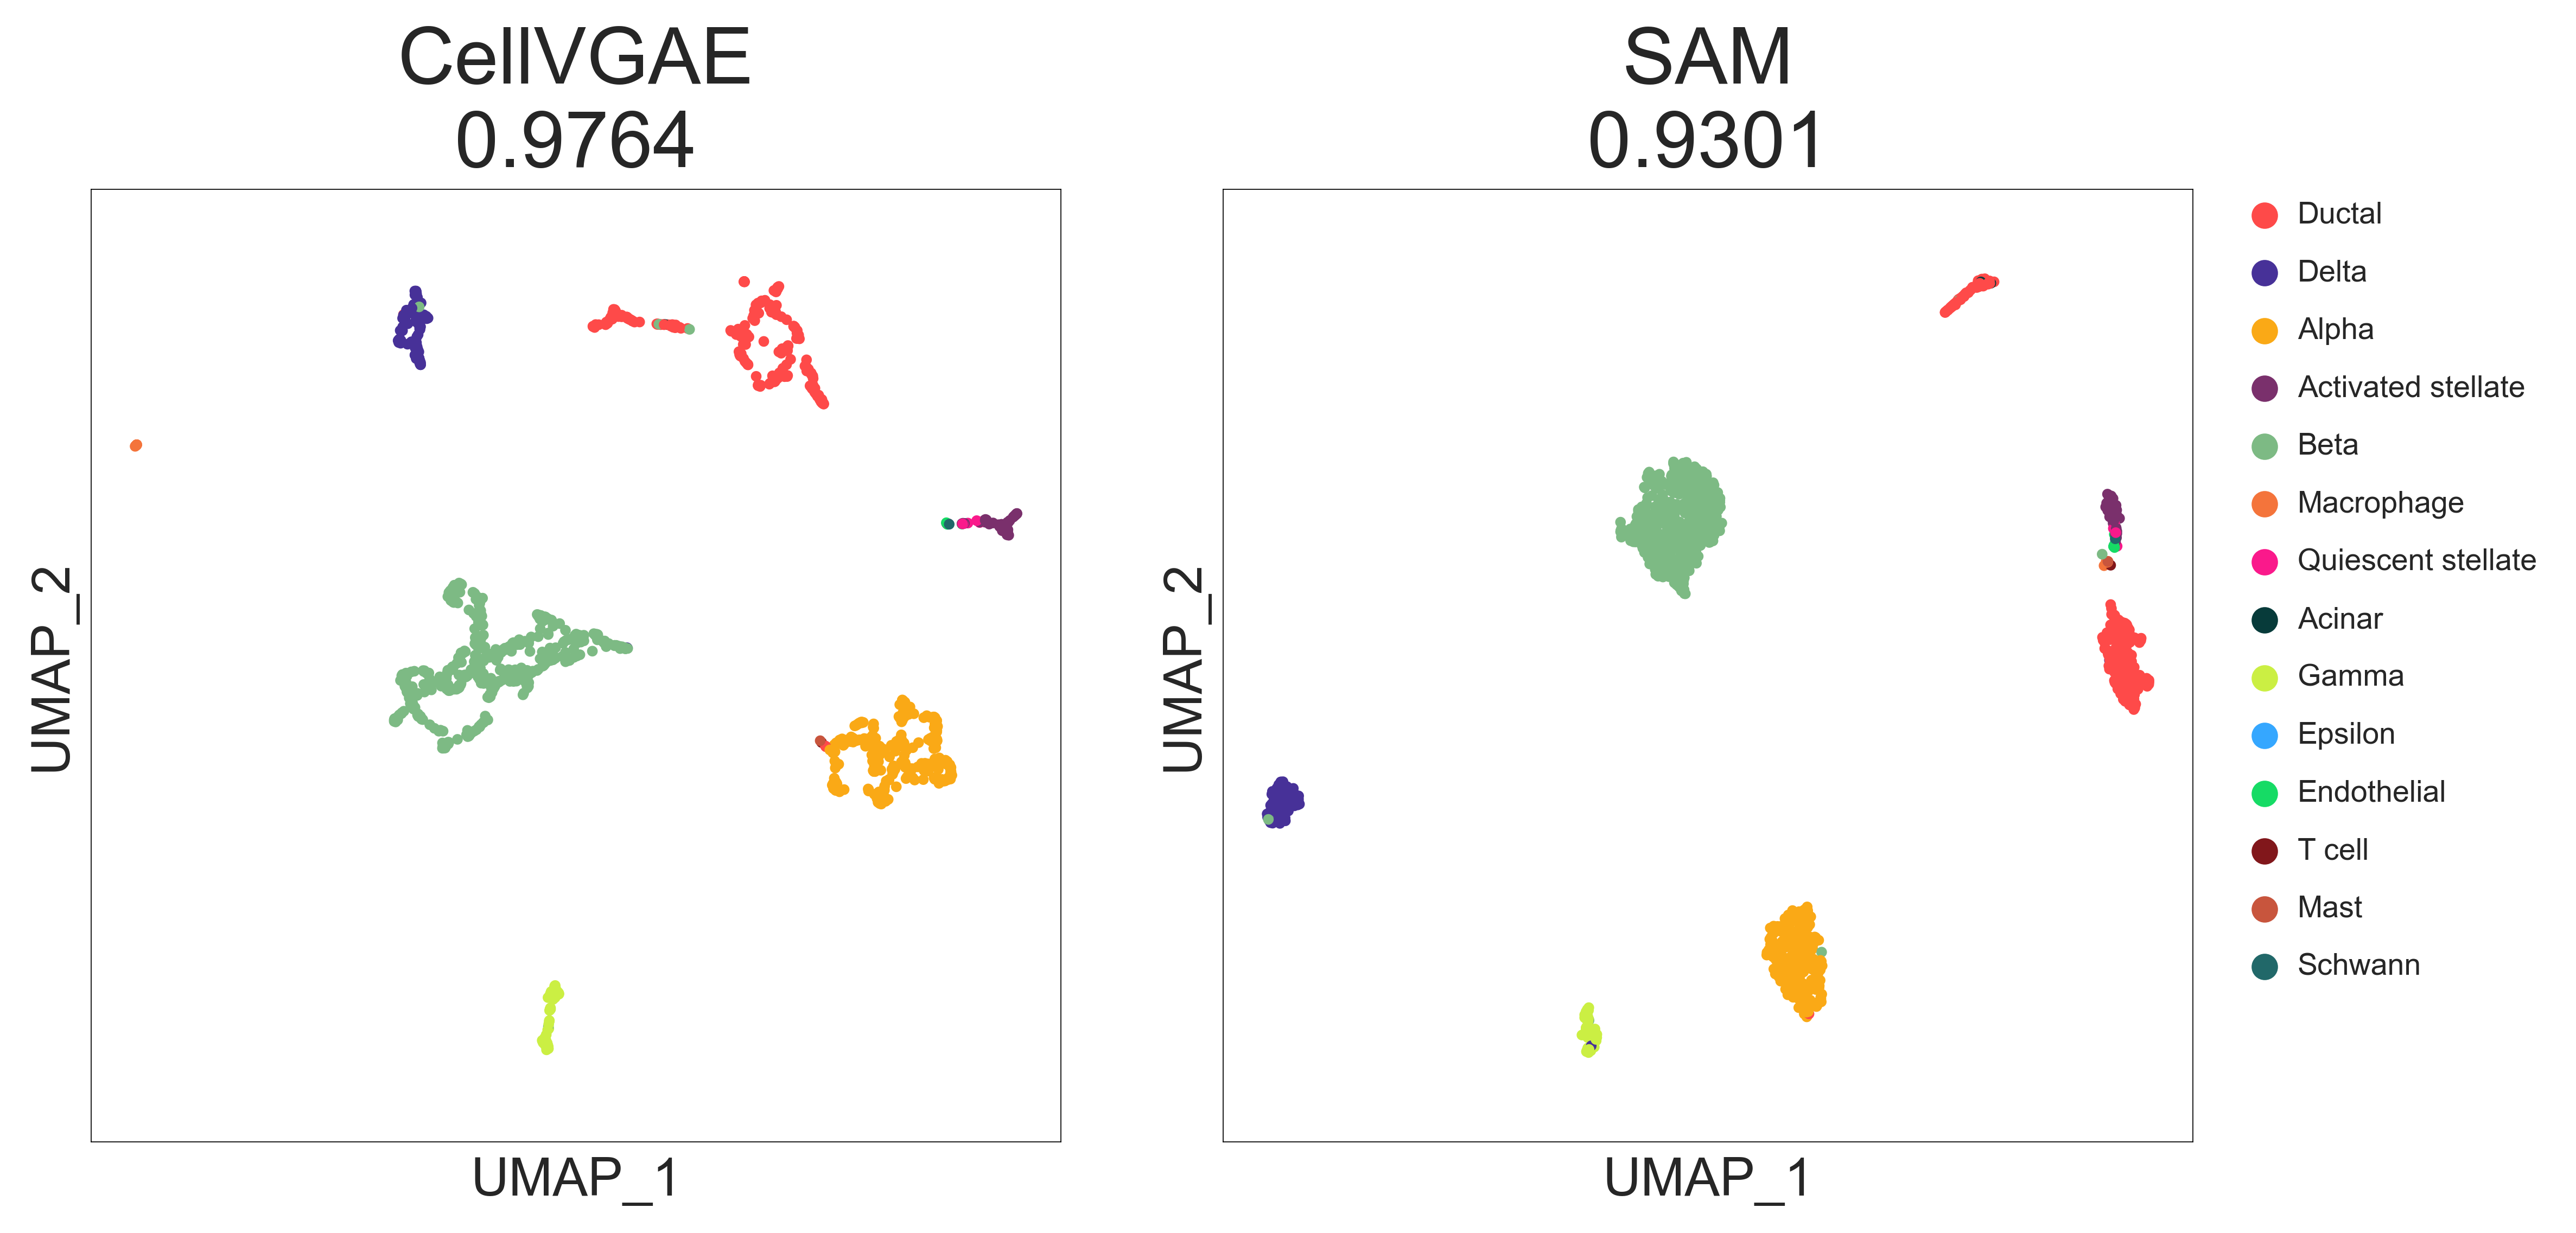

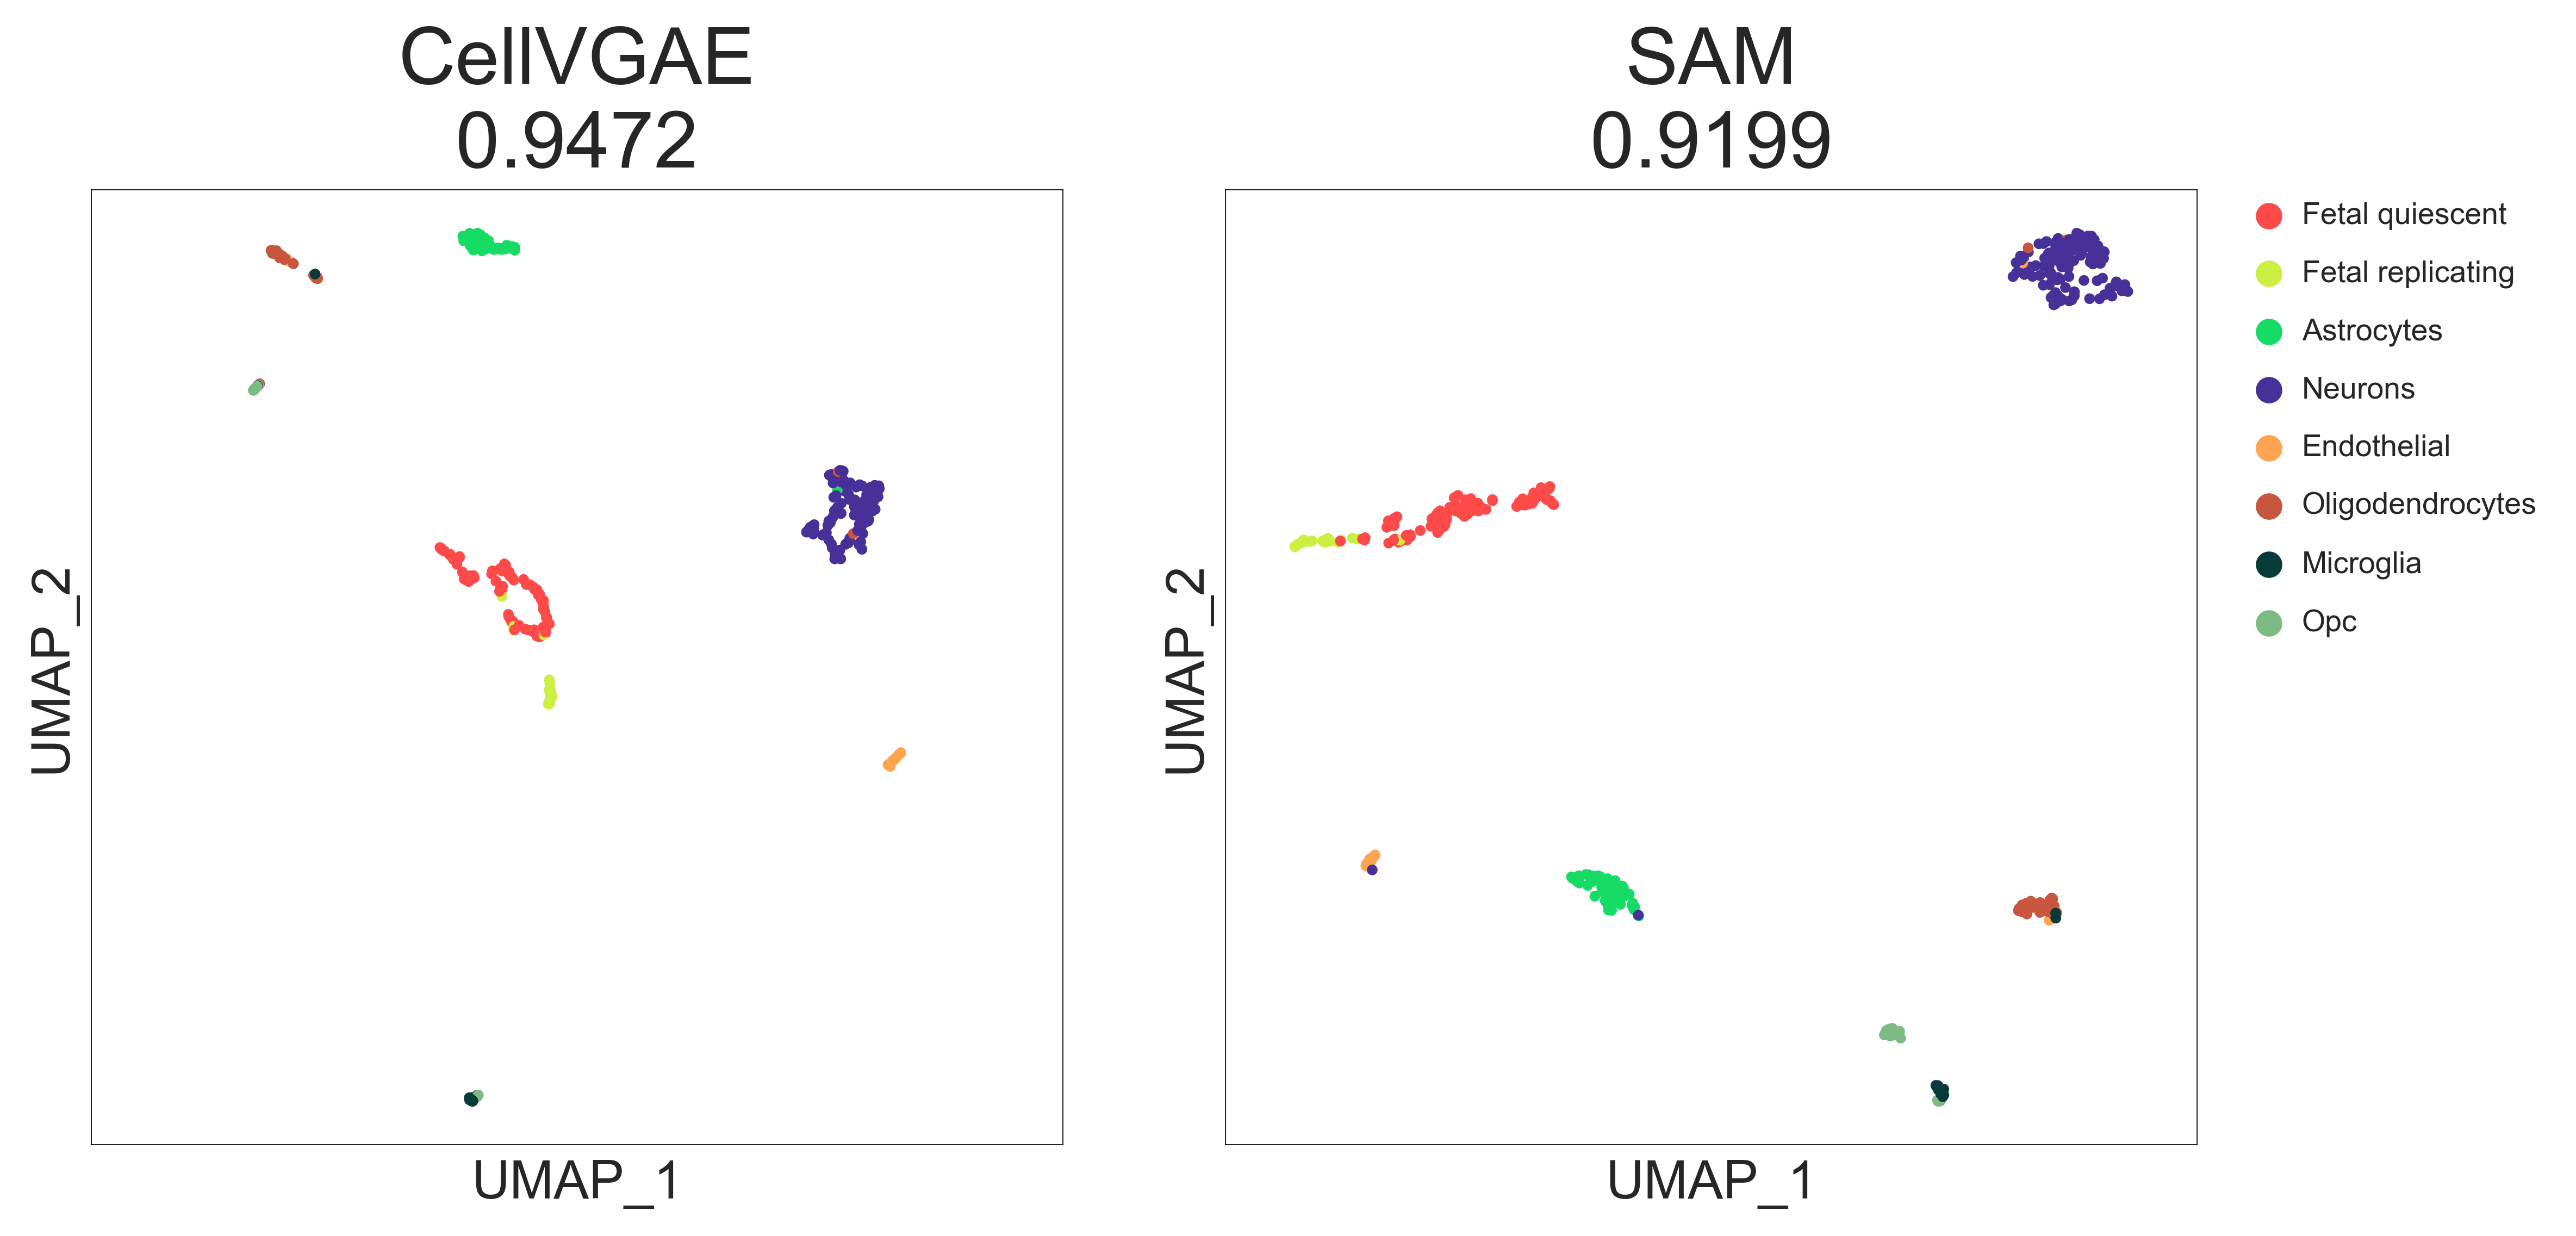

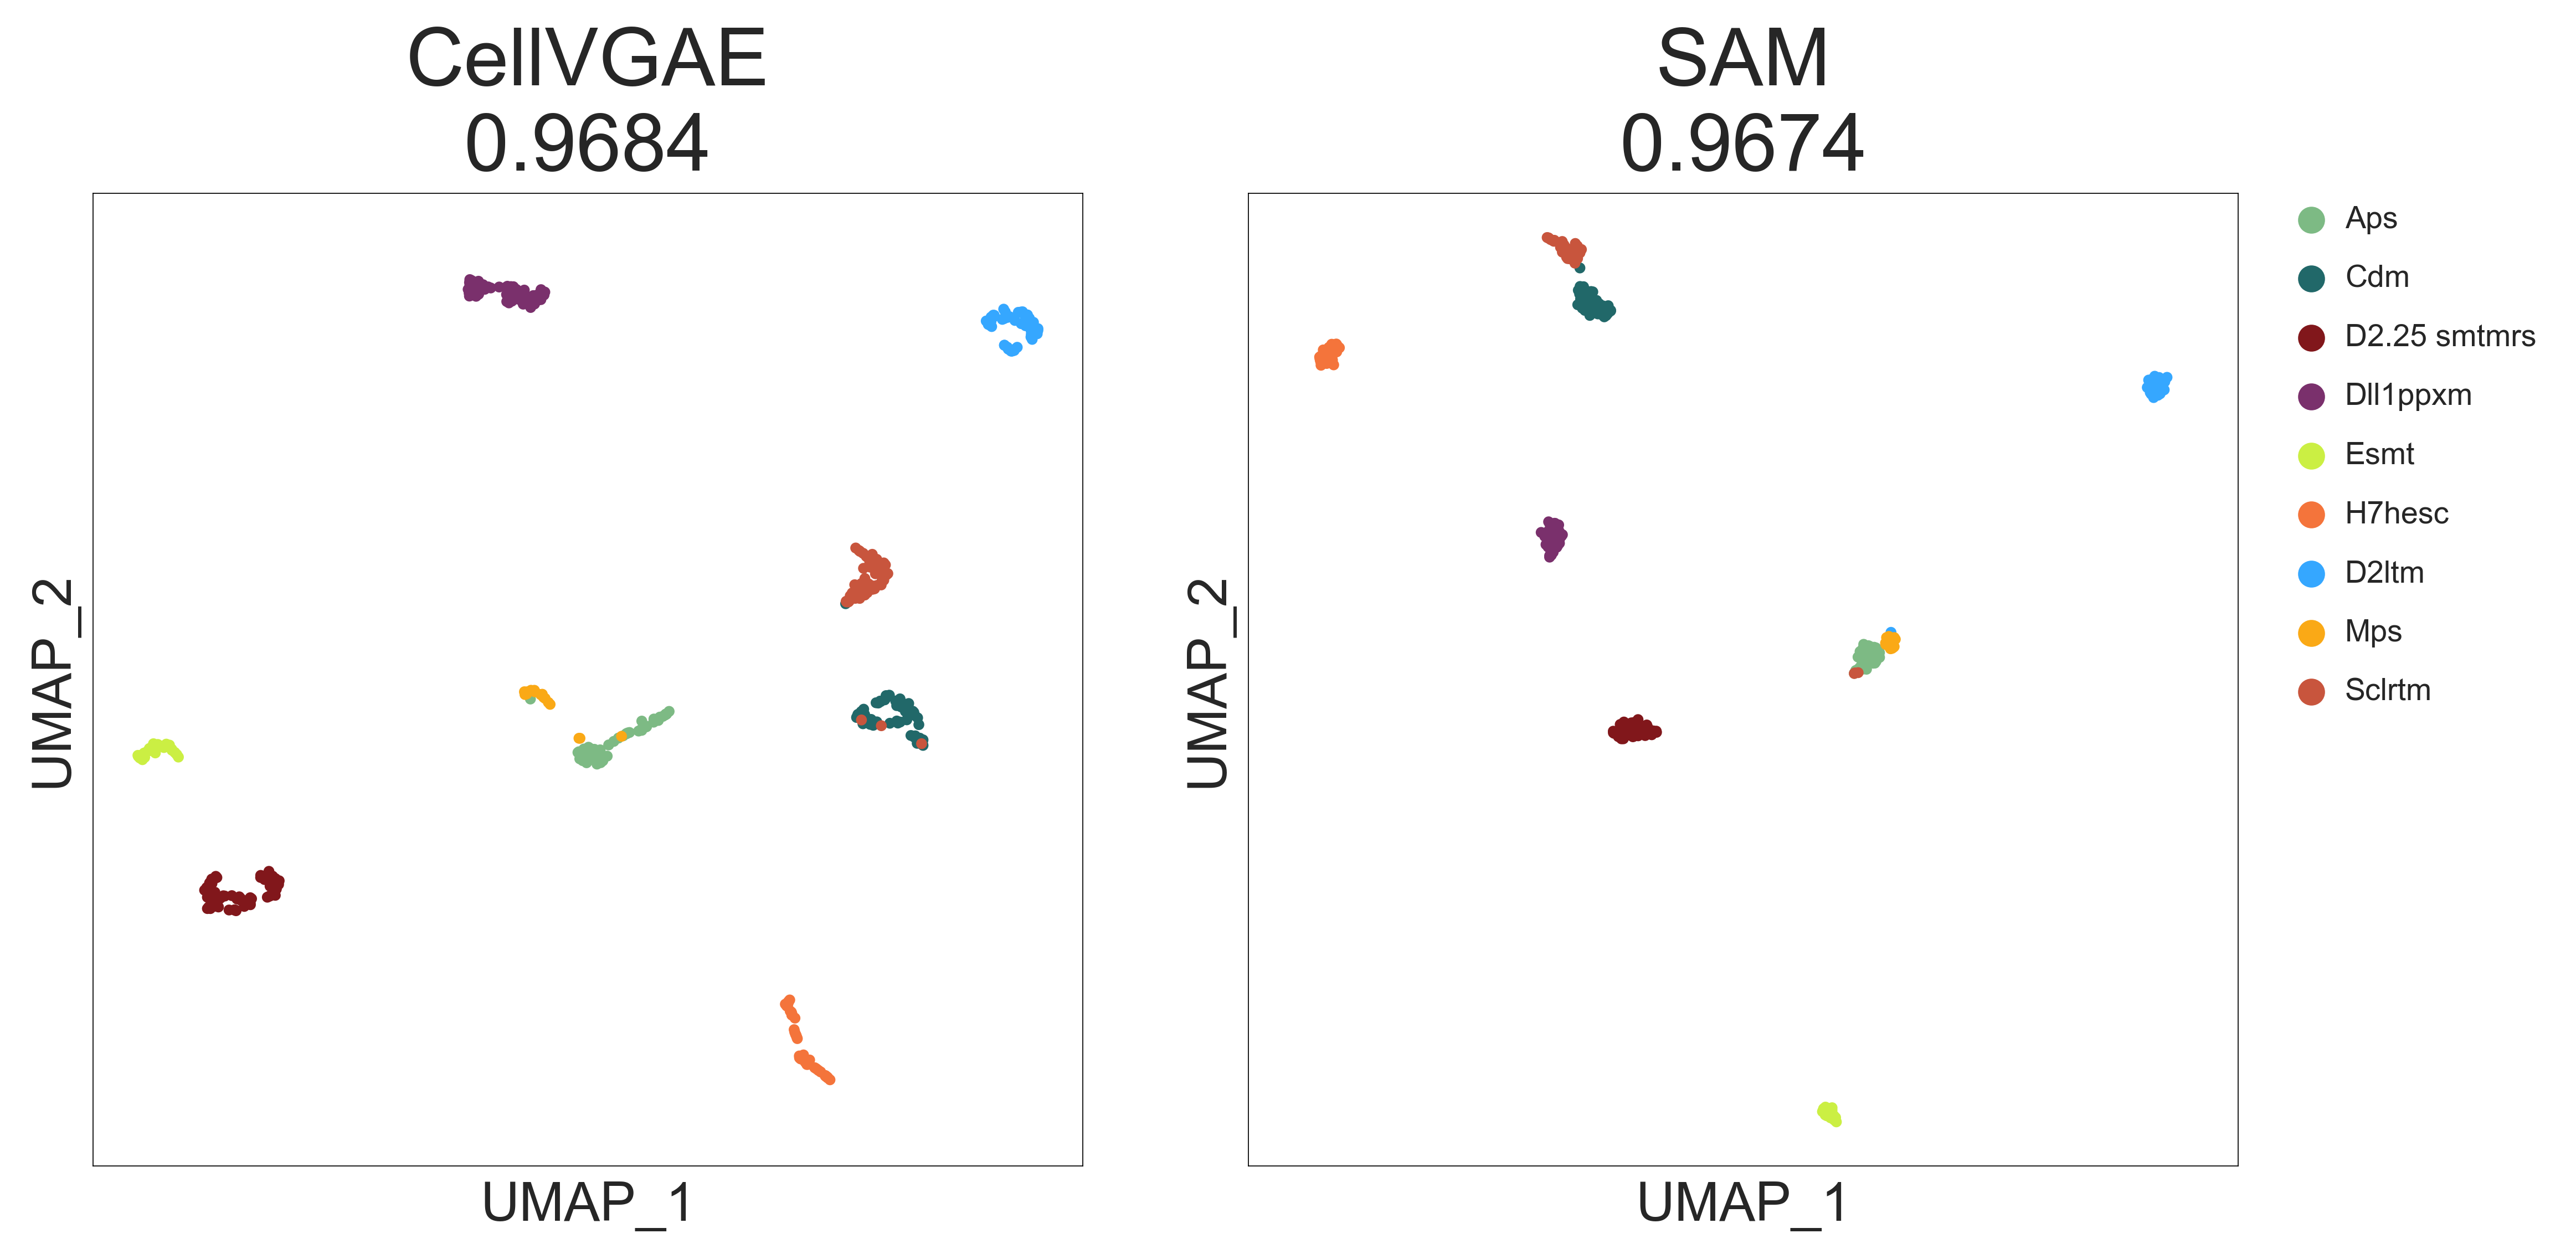

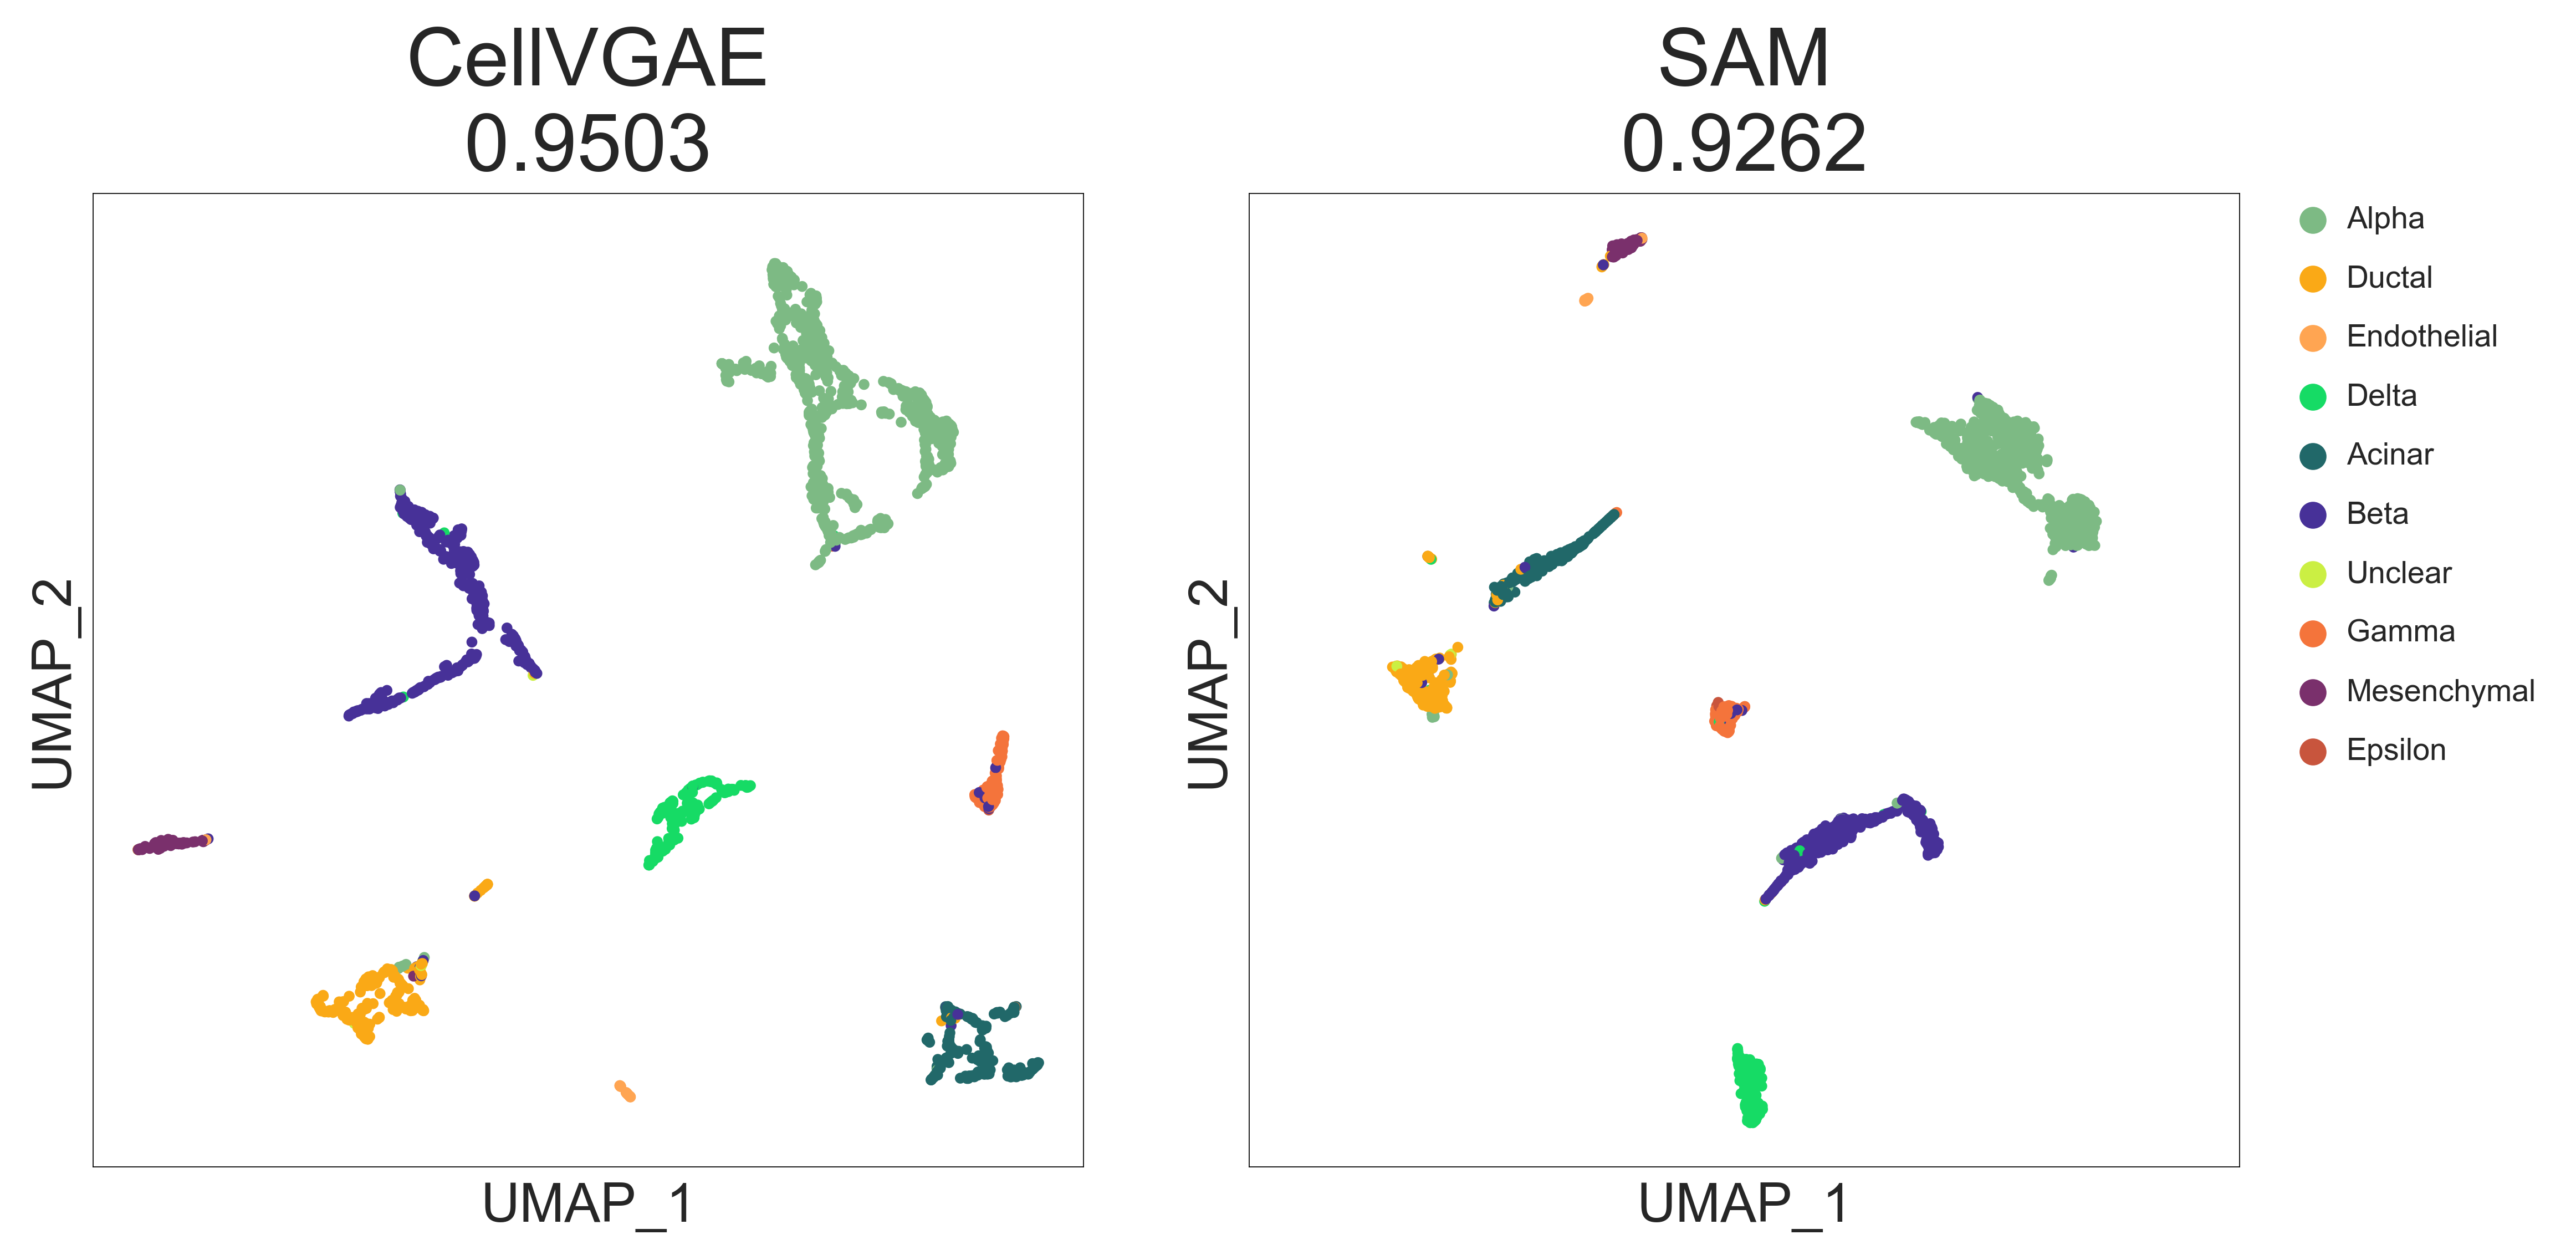

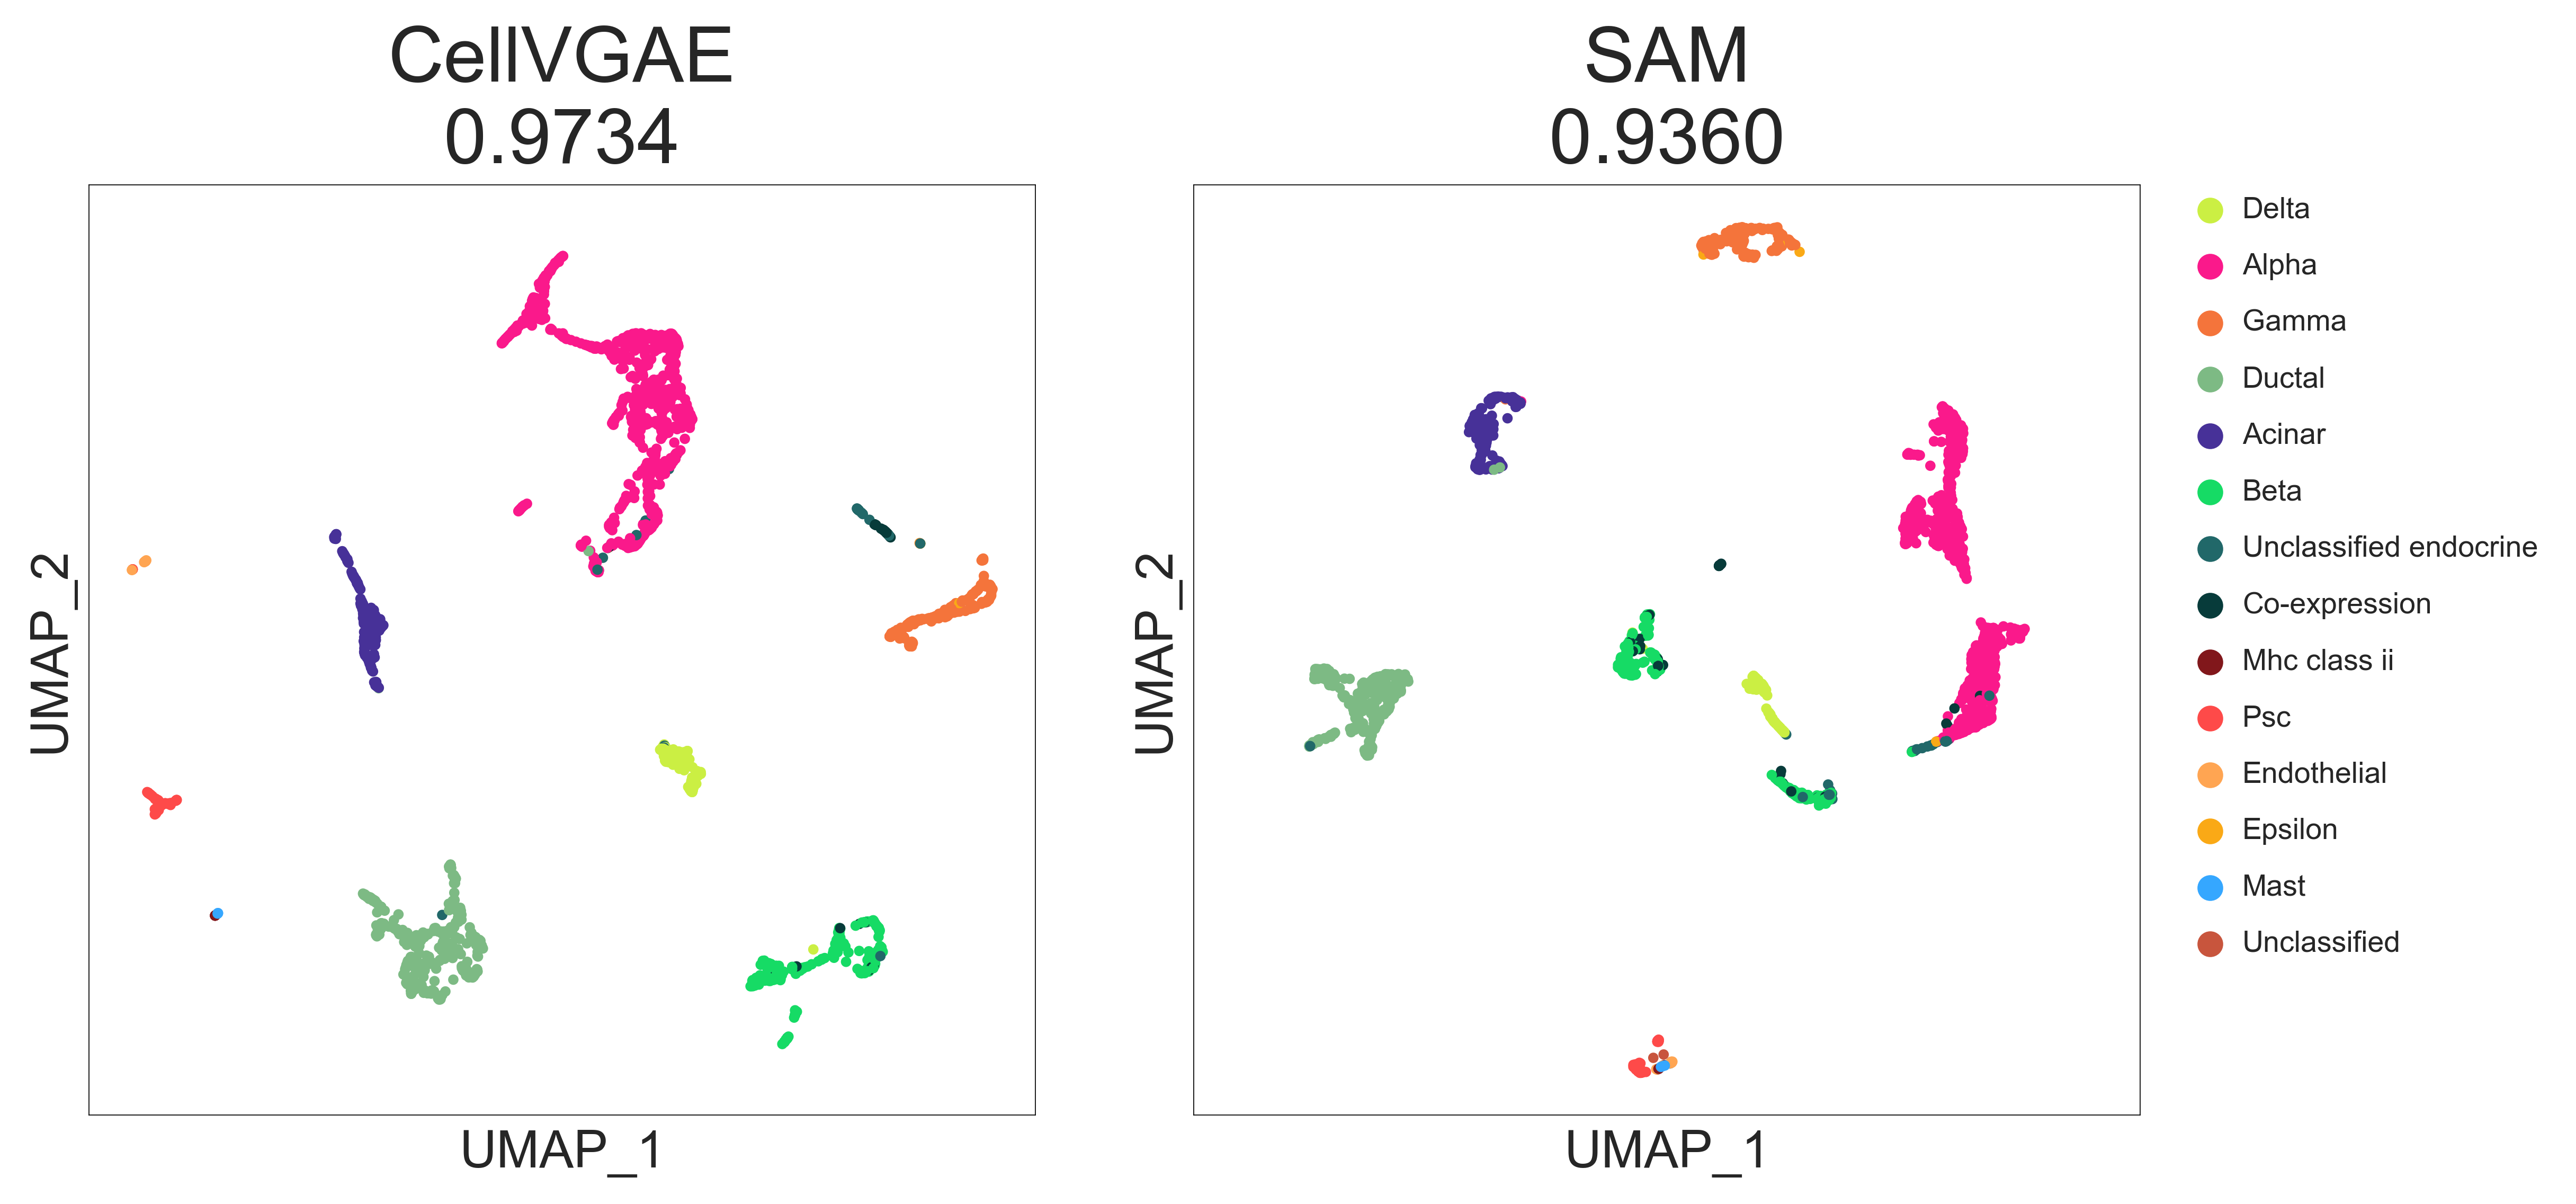

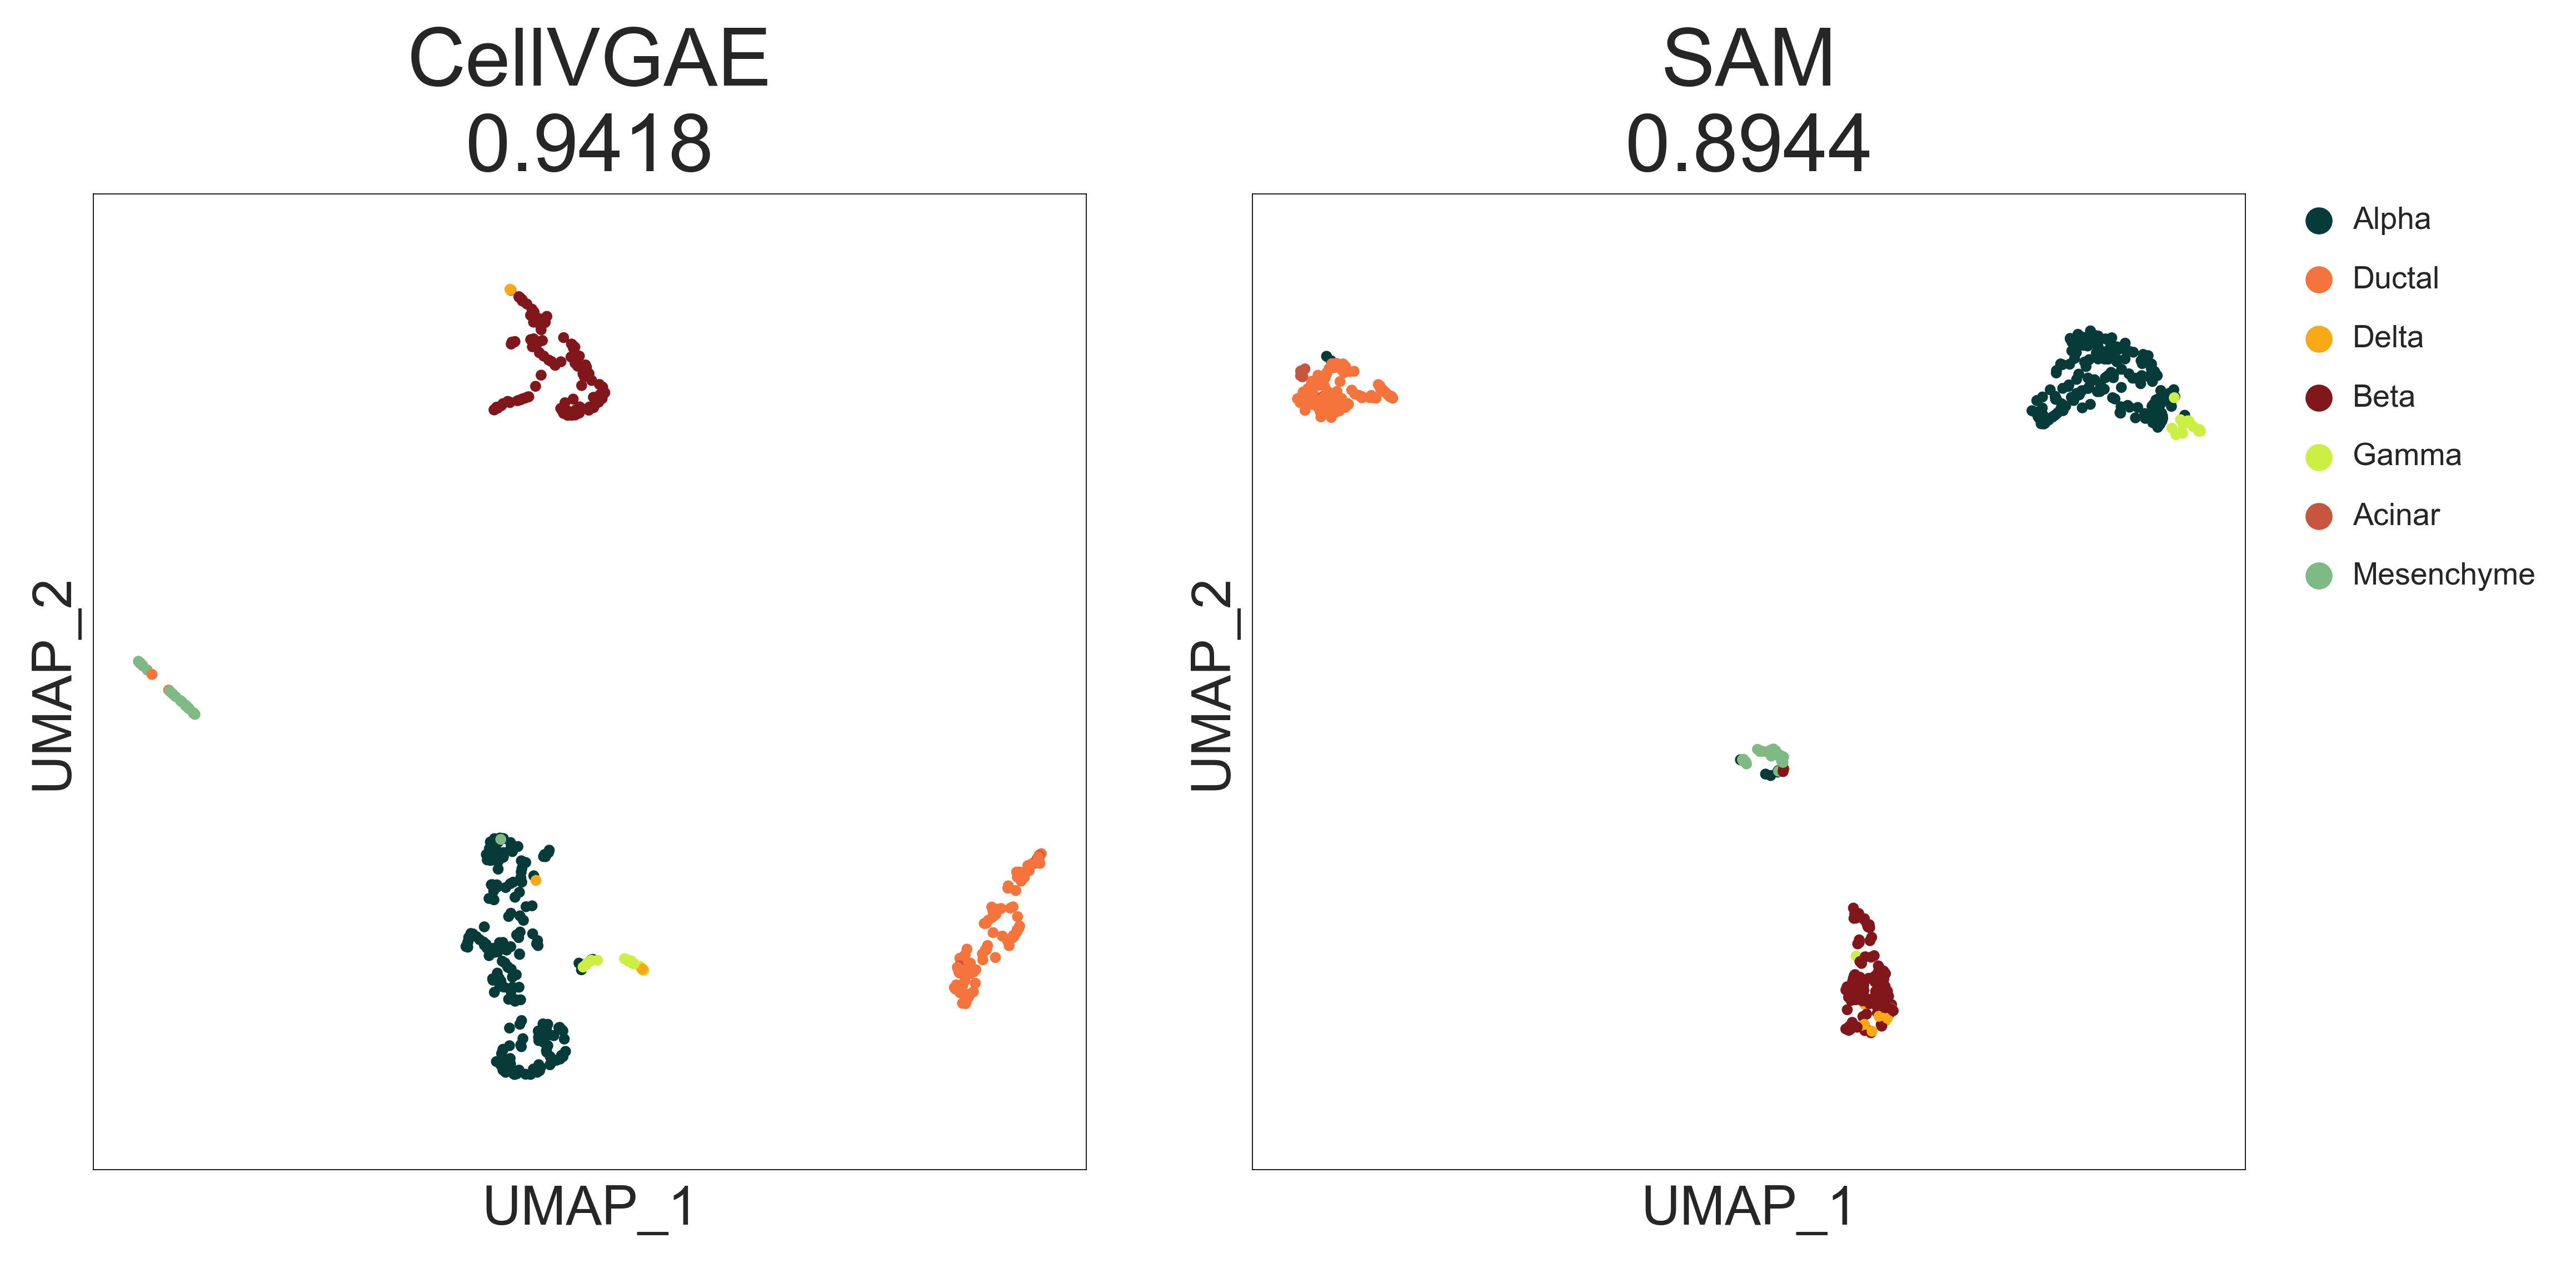

In [20]:
colours['baron1'] = plot_sam_cellvgae(cellvgae_baron1, sam_umaps['baron1'][-1], baron1_gt_clusters, savename='baron1',
                         cellvgae_ari=cellvgae_aris['baron1'], sam_ari=sam_umaps['baron1'][0])

colours['baron2'] = plot_sam_cellvgae(cellvgae_baron2, sam_umaps['baron2'][-1], baron2_gt_clusters, savename='baron2',
                         cellvgae_ari=cellvgae_aris['baron2'], sam_ari=sam_umaps['baron2'][0])

colours['baron3'] = plot_sam_cellvgae(cellvgae_baron3, sam_umaps['baron3'][-1], baron3_gt_clusters, savename='baron3',
                         cellvgae_ari=cellvgae_aris['baron3'], sam_ari=sam_umaps['baron3'][0])

colours['baron4'] = plot_sam_cellvgae(cellvgae_baron4, sam_umaps['baron4'][-1], baron4_gt_clusters, savename='baron4',
                         cellvgae_ari=cellvgae_aris['baron4'], sam_ari=sam_umaps['baron4'][0])

colours['darmanis'] = plot_sam_cellvgae(cellvgae_darmanis, sam_umaps['darmanis'][-1], darmanis_gt_clusters, savename='darmanis',
                         cellvgae_ari=cellvgae_aris['darmanis'], sam_ari=sam_umaps['darmanis'][0])

colours['loh'] = plot_sam_cellvgae(cellvgae_loh, sam_umaps['loh'][-1], loh_gt_clusters, savename='loh',
                         cellvgae_ari=cellvgae_aris['loh'], sam_ari=sam_umaps['loh'][0])

colours['muraro'] = plot_sam_cellvgae(cellvgae_muraro, sam_umaps['muraro'][-1], muraro_gt_clusters, savename='muraro',
                         cellvgae_ari=cellvgae_aris['muraro'], sam_ari=sam_umaps['muraro'][0])

colours['seger'] = plot_sam_cellvgae(cellvgae_seger, sam_umaps['seger'][-1], seger_gt_clusters, savename='seger',
                         cellvgae_ari=cellvgae_aris['seger'], sam_ari=sam_umaps['seger'][0])

colours['wang'] = plot_sam_cellvgae(cellvgae_wang, sam_umaps['wang'][-1], wang_gt_clusters, savename='wang',
                         cellvgae_ari=cellvgae_aris['wang'], sam_ari=sam_umaps['wang'][0])